In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
from astropy.table import Table

### Import Data

Here are some galaxy data from SDSS. These are galaxies with spectroscopy whose redshifts fall in the narrow range
$$0.040<z<0.041$$
in the northern galactic cap. The photometry is required to be
$$13<r<17.6$$
where SDSS has good spectroscopic completeness.  Fainter galaxies weren't targeted for spectroscopy; brighter galaxies often have problems with the imaging pipeline undercounting the flux. There are 2493 galaxies in this set, enough to make plots.

By choosing a narrow redshift range, we avoid a number of analysis complications, e.g., that the flux limits would  correspond to different absolute magnitudes at different redshifts, and that different redshifts would cause the observed bandpasse to measure different rest-frame wavelengths.

This data is publically available here if you want to explore SDSS spectra more:
http://skyserver.sdss.org/dr16/en/tools/search/sql.aspx

Assuming you've uploaded the file *sdss_photometry.csv* to your Colab Notebooks drive, let's mount the Google Drive and get access to the data in that file.

The suffix .csv means it's a data file with columns delimited by a comma.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Change directory to the Colab Notebooks folder in Google Drive
%cd /content/drive/MyDrive/Colab Notebooks/

/content/drive/MyDrive/Colab Notebooks


In [4]:
# read in the data file into a Table.

sdss_photometry = Table.read('sdss_photometry.csv')

In [5]:
#take a look at the table
sdss_photometry

ra,dec,dered_u,dered_g,dered_r,dered_i,dered_z,z,plate,fiberID,mjd
float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64
184.46849,-0.36208395,17.46003,15.82395,15.06769,14.68268,14.35043,0.04032281,287,32,52023
183.97349,0.081615838,18.58362,17.6445,17.44572,17.24725,17.19996,0.04050813,288,400,52000
198.07127,-0.29495414,18.31561,17.34599,16.97116,16.73808,16.5818,0.04061591,295,227,51585
198.03644,-0.23905374,17.8742,16.51754,15.99412,15.73059,15.57275,0.04043624,295,228,51585
198.03644,-0.23905374,17.8742,16.51754,15.99412,15.73059,15.57275,0.0404517,295,228,51985
198.07127,-0.29495414,18.31561,17.34599,16.97116,16.73808,16.5818,0.04062444,295,237,51985
225.4385,0.0084468377,17.22139,15.2297,14.31682,13.88832,13.56455,0.04098697,310,201,51616
225.45457,0.056503837,18.00854,16.89662,16.47227,16.29257,16.1633,0.04067294,310,216,51616
225.4385,0.0084468377,17.22139,15.2297,14.31682,13.88832,13.56455,0.04093848,310,227,51990


These column names may seem odd to you. All columns starting with "dered" are apparent magnitudes in a given band (u, g, r, i, and z). "dered" means the magnitudes have been adjusted for the reddening that occurs from dust in our own galaxy. This table includes both photometric and spectroscopic data from SDSS.

### Calculate absolute magnitudes and and colors
Complete the lines below to add the necessary columns to the data table. Remember that $M_r =r-5\log_{10}(d/10\ {\rm pc})$, and you'll have to include units.

### Beware the possible z-confusion! ###
There is a potential confusion between the photometric passband z and the use of z to denote redshift. The table we have clearly designates the z-band photometry as 'dered_z', whereas redshift is just 'z'.

In the cell below we want you to enter some expressions to calculate quantitites of interest. First we'll determine distances from redshifts. Then we'll use the known distances to convert from apparent to absolute magnitudes.
Finally, we'll compute some broadband colors of these galaxies.

Here is a plot that shows the SDSS passbands superimposed on a reference spectrum that has the 400 nm Balmer break.

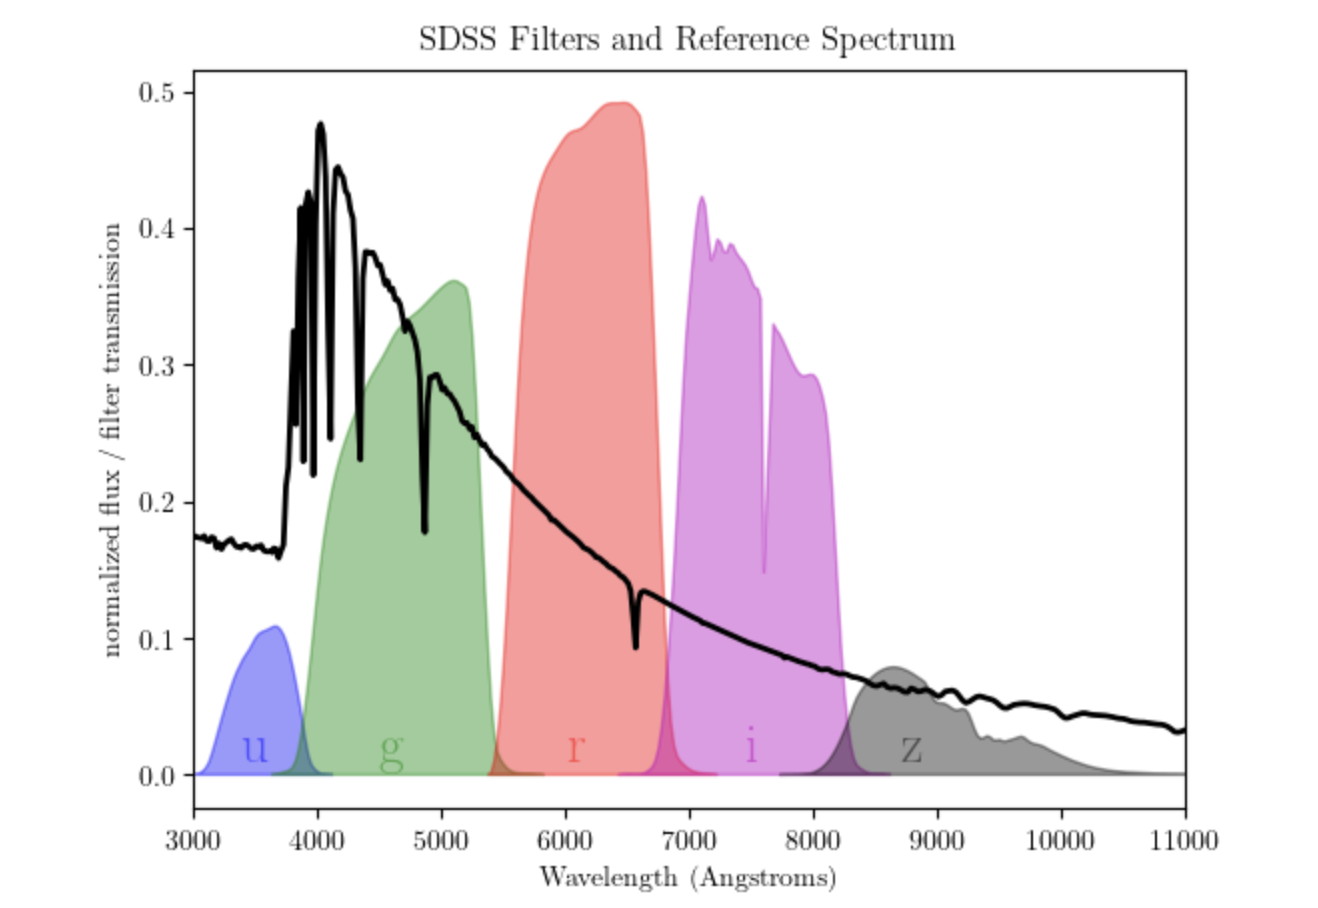

In [6]:
# Don't forget units! Hints: you'll use these: np.log10(), 10*u.pc
# remember that to plug in values from the datatable, use the name of the table followed by ['column_name']
# ...for example, for redshift use sdsss_photometry['z']

# Defining some useful constants
H0 = 70 * u.km / u.s / u.Mpc       # Hubble constant
from astropy.constants import c    # speed of light


sdss_photometry['distance_Mpc'] =            # your equation here for the distance to the galaxies in Mpc. You need to convert redshift to apparent velocity first
sdss_photometry['absolute_magnitude_r'] =    # your equation here for the absolute magnitude of the galaxies in the r band
sdss_photometry['color_u_g'] =                 # your equation here for the u-g color
sdss_photometry['color_r_z'] =                 # your equation here for the r-z color
sdss_photometry['color_g_r'] =                 # your equation here for the g-r colo


SyntaxError: invalid syntax (ipython-input-83289645.py, line 10)

### Checking the results ###

Computing the galaxy colors is a pretty simple subtraction. Computing the galaxy distances from redshifts is a bit more error-prone. Let's check the results.

First, make a calculation by hand to see what distance in Mpc corresponds to a redshift of z=0.040. Then make a new cell below and have Python print out some values of your computed distances. If they don't agree, one or both of the calculations is wrong somehow. This is an example of code validation and verification at work!

The next step is to check the determination of absolute magnitudes. We can do that with a quick histogram, below.

### Plotting Things
Some plotting code is completed for you, but feel free to explore ways to customize your plots.

In [ ]:
plt.hist(sdss_photometry['absolute_magnitude_r'], histtype='step', bins=20)
plt.xlim(np.max(sdss_photometry['absolute_magnitude_r'])+.5, np.min(sdss_photometry['absolute_magnitude_r'])-.5)  # we usually plot magnitudes from left to right
plt.yscale('log') # this is to make the plot look more like the familliar luminosity function. See what the plot looks like without this line!
plt.title('Luminosity Function from SDSS')
plt.xlabel(r'Absolute Magnitude, $M_r$');
plt.ylabel('Number of Galaxies');

# looking back at the Canvas notes about the luminosity function of galaxies, if your plot's x axis isn't in the
# regime of -19 > M> -23, there is something amiss and you need to check your work above.

#### your input needed here:

Compare your version of the luminosity function to the one on the Canvas notes page.

What is similar and what's different?

Why was it important for us to limit the range of galaxy redshifts to make this plot?

### Now let's make a color-magnitude diagram for these galaxies ###

It's customary to have color-magnitude diagrams with magnitude on the x-axis, and color on the y axis.

In [ ]:
plt.scatter(sdss_photometry['absolute_magnitude_r'], sdss_photometry['color_g_r'], s=1)
plt.xlim(np.max(sdss_photometry['absolute_magnitude_r'])+.5, np.min(sdss_photometry['absolute_magnitude_r'])-.5)
plt.title('SDSS Color-Magnitude Relation, g-r')
plt.xlabel(r'Absolute Magnitude, $M_r$')
plt.ylabel(r'$g-r$ color');

#### Your input needed here, based on the color-agnitude diagram (CMD) above  ###

Which vertical direction in the CMD is redder? Which horizontal direction is fainter?

Do you see a concentration of red galaxies of almost constant color? What might they be? Take a look at the figure of the SDSS passbands above... it suggests that the u-g color might be more definitive for finding galaxies with a clear Balmer break. Let's try that.

In [ ]:
plt.scatter(sdss_photometry['absolute_magnitude_r'], sdss_photometry['color_u_g'], s=1)
plt.xlim(np.max(sdss_photometry['absolute_magnitude_r'])+.5, np.min(sdss_photometry['absolute_magnitude_r'])-.5)
plt.ylim(0.75,2.50)
plt.title('SDSS Color-Magnitude Relation, u-g')
plt.xlabel(r'Absolute Magnitude, $M_r$')
plt.ylabel(r'$u-g$ color');

In [ ]:
plt.scatter(sdss_photometry['color_g_r'], sdss_photometry['color_r_z'], s=1)
plt.title('Colors from SDSS')
plt.ylabel(r'$g-r$ Color');
plt.xlabel(r'$r-z$ Color');

## Visualizing the Cosmic Web ###

We have a slice of SDSS galaxies in a thin redshift shell. Their 3-d spatial distribution traces out the large scale structure, and the impact of the dark matter-dominated gravitational potential wells (likely arising from quantum fluctuations!) into which they fell.

See if you can get Gemini to make you a set of cells that gives a nice interactive 3d plot of the locations of these galaxies. You'll have to ask it to first convert the redshift, RA, and DEC data into (x,y,z) positions, in Mpc. Then have it make a Colab cell that gives an interactive 3d plot that you can rotate around to look at the locations of the galaxies that reside in this redshift shell. If successful your output should look something like this:

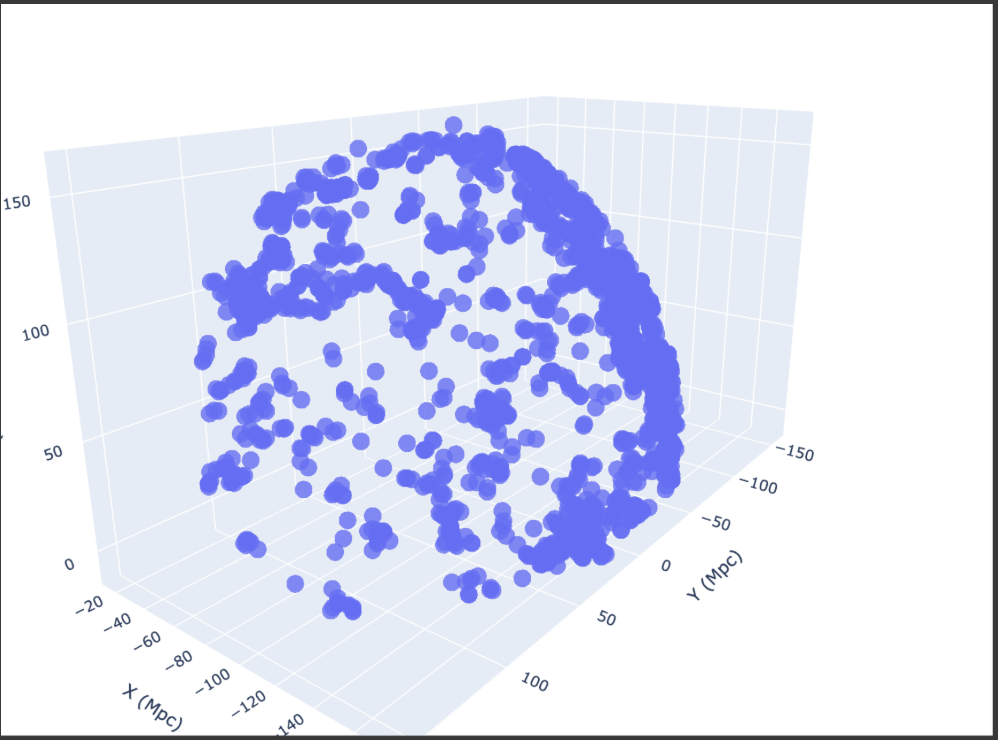

### Your input needed here ###

Once that succeeds, answer these questions:

1. Where is the center of this shell-like structure?

2. Do the galaxies look like they are distributed randomly, or are there web-like structures?

3. Can you think of a statistic that could capture the non-uniformity of galaxy density.